In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
output_path = "../../../output"

seg_output_path = os.path.join(output_path, 'segmentation')

trained_models = os.listdir(seg_output_path)
print(trained_models)


['deeplabv3_mobilenet_v3_large_random', 'deeplabv3_resnet101_pretrained', 'deeplabv3_resnet101_random_withoutlog', 'deeplabv3_resnet50_pretrained', 'deeplabv3_resnet101_random', 'lraspp_mobilenet_v3_large_random', 'deeplabv3_resnet50_random', 'deeplabv3_mobilenet_v3_large_pretrained', 'deeplabv3_resnet50_random_withoutlog']


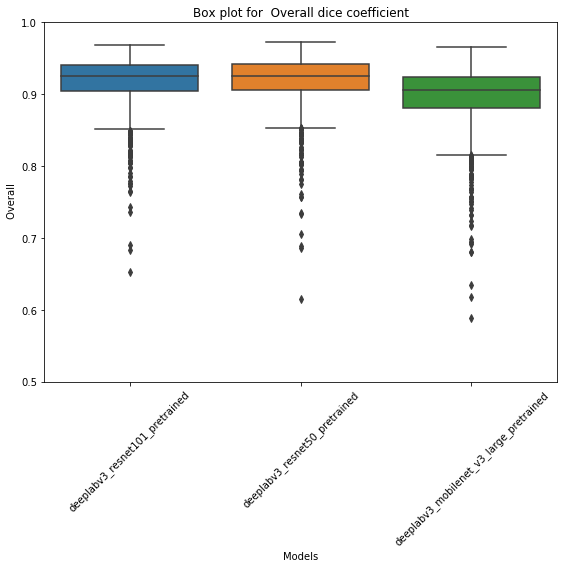

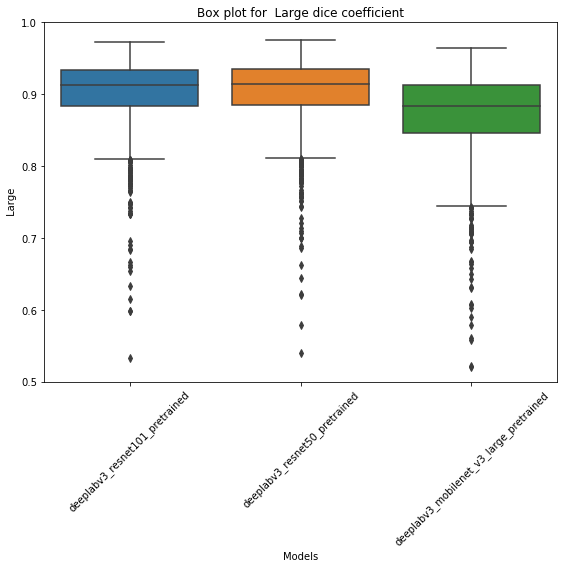

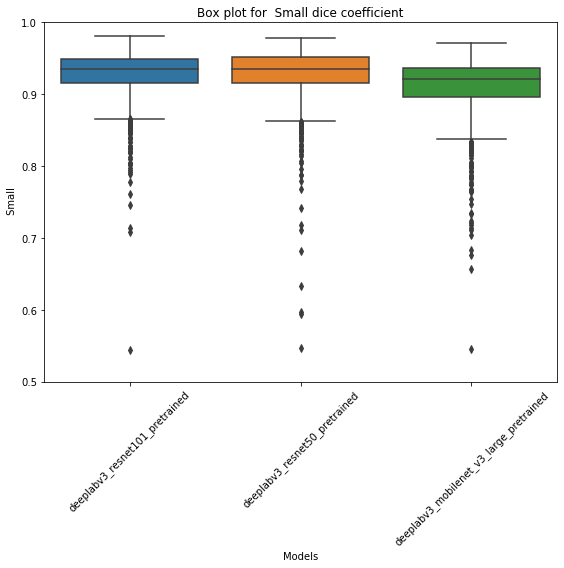

In [14]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_box_plot(data, x_label, y_label, title, save_filename):
    plt.figure(figsize=(8, 8))
    sns.boxplot(x=data.index.get_level_values(0), y=data)
    plt.ylim(y_limits) 
    plt.xticks(rotation=45)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(save_filename)
    plt.show()

# Your code to read and combine dataframes goes here
testFilePaths = [os.path.join(os.path.join(seg_output_path, modelname), 'test_dice.csv') for modelname in trained_models]
dataframes = []
file_names = []

# Read data from CSV files and store them in dataframes
for csv_file_path in testFilePaths:
    if os.path.exists(csv_file_path):
        dataframe = pd.read_csv(csv_file_path)
        dataframes.append(dataframe)
        file_names.append(os.path.basename(os.path.dirname(csv_file_path)))

# Combine all dataframes into a single dataframe
combined_dataframe = pd.concat(dataframes, keys=file_names)
# Get column names from the dataframe
column_names = combined_dataframe.columns

y_limits = (0.5, 1.0)  # Set the desired y-axis limits

for idx, column_name in enumerate(column_names[1:4], start=1):  # Start from index 1 to exclude the first column
    create_box_plot(
        data=combined_dataframe[column_name],
        x_label='Models',
        y_label=column_name,
        title=f'Box plot for {column_name} dice coefficient',
        save_filename=f'./box_plot_col{column_name}.png'
    )
